In [69]:
#import classes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import RFE, RFECV
from sklearn import linear_model, metrics
import seaborn as sns

In [70]:
#read in csv
data = pd.read_csv('C:/Users/billf/Desktop/Data_Science/LogisticRegressionPractice/mushrooms.csv')

In [71]:
data.shape

(8124, 23)

In [72]:
data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [73]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [74]:
#transform categorical data
shrooms_training_data=data.drop('class',1)
shrooms=pd.get_dummies(shrooms_training_data)
shrooms.insert(loc=0, column='class', value=data['class'])
shrooms.head(3)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [75]:
shrooms['class'] = shrooms['class'].map({'e': 0, 'p': 1})      
shrooms.head(3)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [76]:
#check for null values
#shrooms.isnull().sum().sort_values(ascending=False)
X = shrooms.drop('class',1)
y = shrooms['class']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
correlation_frame = (shrooms.corr(method='pearson')['class']).to_frame(name='coef').sort_values('coef',ascending=False)
correlation_frame

,coef
class,1.000000
odor_f,0.623842
stalk-surface-above-ring_k,0.587658
stalk-surface-below-ring_k,0.573524
gill-size_n,0.540024
gill-color_b,0.538808
bruises_f,0.501530
spore-print-color_h,0.490229
ring-type_l,0.451619
population_v,0.443722


In [79]:
logreg = linear_model.LogisticRegression()
rfecv = RFECV(estimator=logreg, step=5, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)
print(rfecv.n_features_)
print(X_train.columns[rfecv.support_])

117
Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)


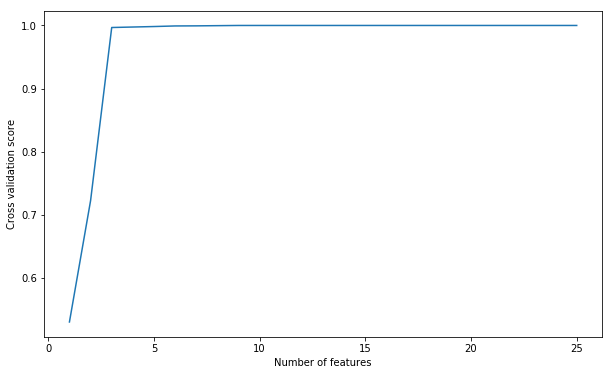

In [80]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [81]:
def model_features(X_train,X_test):
    model_features = list(X_train.columns[rfecv.support_])
    X_train = X_train[model_features]
    X_test = X_test[model_features]
    return X_train, X_test

X_train, X_test = model_features(X_train,X_test)
X_test.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
3251,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
5823,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6909,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
780,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
6780,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [82]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)
print("Training accuracy:",metrics.accuracy_score(y_train, y_train_pred)*100)

Training accuracy: 100.0


In [83]:
logreg.intercept_
logreg.coef_

array([[ 0.29806028,  0.51335823, -0.05388663,  0.03539023, -0.55729338,
        -0.14743522, -0.8299689 ,  0.74595445,  0.18966028, -0.01745234,
         0.92589461, -0.85917418,  0.02226227, -0.02495825, -0.44915922,
         0.77149463, -0.31844156, -0.31423525,  0.53139606, -0.19688559,
        -0.01969389,  0.1078874 , -2.79802571,  2.67495186,  2.66248671,
        -2.74972205,  0.33061771, -3.96504375,  2.21251763,  0.86022387,
         0.86018722, -0.12724095,  0.21543446,  1.55618776, -1.46799426,
        -2.10261311,  2.19080662,  1.86108957, -0.51521784, -0.00445513,
         0.28057022, -0.40943498, -0.64922502, -0.10074473, -0.43606724,
         0.61050122, -0.34689554, -0.39183005,  0.18990304,  0.68955347,
        -0.60135996, -0.49638083,  2.37470163, -0.95843385,  0.10782097,
        -0.93951442, -0.75312648,  1.72525642, -1.03731966,  0.15338323,
        -1.04492638,  0.37496624, -0.52445026,  1.2826039 ,  0.19999574,
         0.33061771, -0.46320308, -0.35622651, -0.1

In [84]:
unindexed_X=X_train.reset_index()
train_probability = logreg.predict_proba(X_train)[:,1]
train_results = pd.DataFrame({
     "Number":list(unindexed_X["index"]),
     "Prediction":list(y_train_pred),
     "Probabilities":list(train_probability),
     "Confidence":list(abs(0.5-train_probability)),
     "ActualResult":list(y_train)
     })
train_results = train_results[['Number', 'Prediction', 'Probabilities', 'Confidence', 'ActualResult']]
train_results.to_csv("train_shrooms_results.csv", 
          index=False)

In [85]:
y_test_pred = logreg.predict(X_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, y_test_pred)*100)

Testing accuracy: 100.0


In [86]:
unindexed_X=X_test.reset_index()
test_probability = logreg.predict_proba(X_test)[:,1]
test_results = pd.DataFrame({
     "Number":list(unindexed_X["index"]),
     "Prediction":list(y_test_pred),
     "Probabilities":list(test_probability),
     "Confidence":list(abs(0.5-test_probability)),
     "ActualResult":list(y_test)
     })
test_results = test_results[['Number', 'Prediction', 'Probabilities', 'Confidence', 'ActualResult']]
test_results.to_csv("test_shrooms_results.csv", 
          index=False)